In [2]:
from matplotlib import pyplot as plt, animation, cm
import numpy as np
from numpy import pi

In [3]:
x0 = 0
xf = pi
t0 = 0
tf = 500

M = 2000  # time steps
N = 200  # space steps

u = 0.01 # friction power
v = 0.05  # wave speed
h = pi / 4  # wavelength
a = 0.1  # amplitude

In [4]:
I = lambda x: x*0  # initial condition
INPUT = True # Whether the wave receives an input
PERIODS = 1  # Number of input periods
FRICTION = False # wheather there is friction
CREATE_VIDEO = False # wheather it creates a video

In [5]:
x, dx = np.linspace(x0, xf, N, retstep=True) # creates the array of locations in the simulation
t, dt = np.linspace(t0, tf, M, retstep=True) # creates the array of time in the simulation (frames)

r = (v*dt/dx)**2 # the basic function
b = u*dt # the friction function

In [6]:
u = np.zeros((M, N))
u[0] = I(x)
u[1] = I(x)

In [7]:
'''
if there is an input from the side of the rope,
the loops runs as long the periods arent or until the simulation ends,
the for applies the formula as a wave to the starting point of the rope: u[height][0]
'''
if INPUT:
    for i in range(0, M):
        if t[i] > PERIODS*h/v:
            break
        u[i][0] = a*np.sin((2*pi*v/h)*t[i])
#         u[i][-1] = a*np.sin((2*pi*v/h)*t[i])

In [8]:
'''
two loop the run for the whole rope,
the first loop runs the time, it is each frame of the mp4,
the second loop is the height of the rope at each point
'''
for i in range(1, M-1):
    for j in range(1, N-1):
        if FRICTION:
            u[i+1][j] = (r*(u[i][j+1] - 2*u[i][j] + u[i][j-1]) + (b + 2)*u[i][j] - u[i-1][j]) / (b + 1)
        else:
            u[i+1][j] = r*(u[i][j+1] - 2*u[i][j] + u[i][j-1]) + 2*u[i][j] - u[i-1][j]

In [9]:
def init():
    line.set_data([], [])
    return line,

In [10]:
def animate(i):
    line.set_data(x, u[i])
    return line,

Text(0, 0.5, 'Displacement [m]')

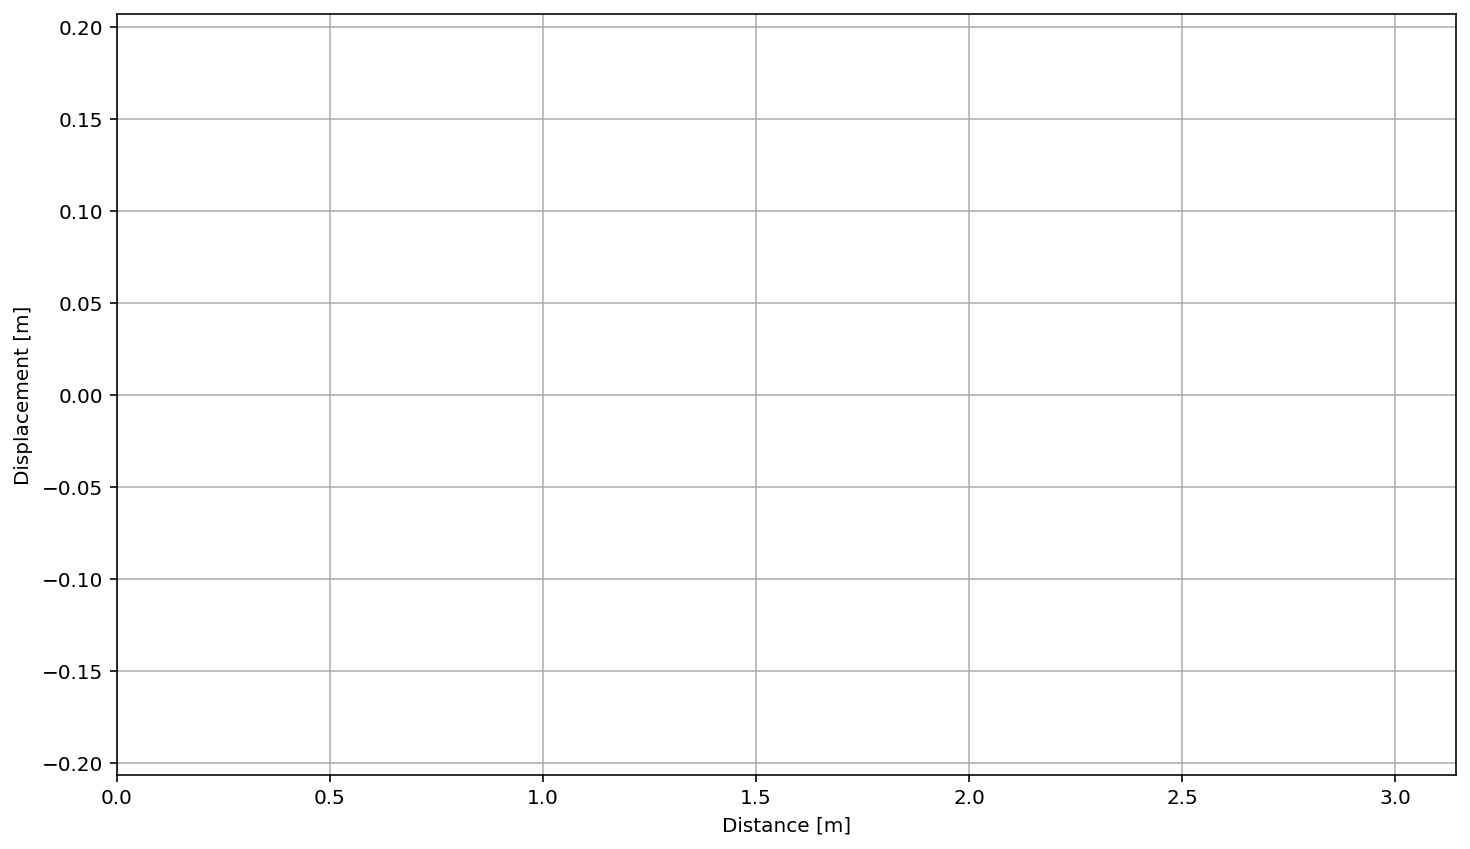

In [11]:
fig = plt.figure()
ax = plt.subplot(1, 1, 1, xlim=(x0, xf), ylim=(np.amin(u), np.amax(u)))
line, = ax.plot([], [], 'r.-')
ax.grid()
ax.set_xlabel('Distance [m]')
ax.set_ylabel('Displacement [m]')

In [12]:
if CREATE_VIDEO:
    anim = animation.FuncAnimation(fig, animate, init_func=init, frames=M, interval=10, blit=True)
    anim.save('wave.mp4', fps=60, extra_args=('-vcodec', 'libx264'))
    plt.show()

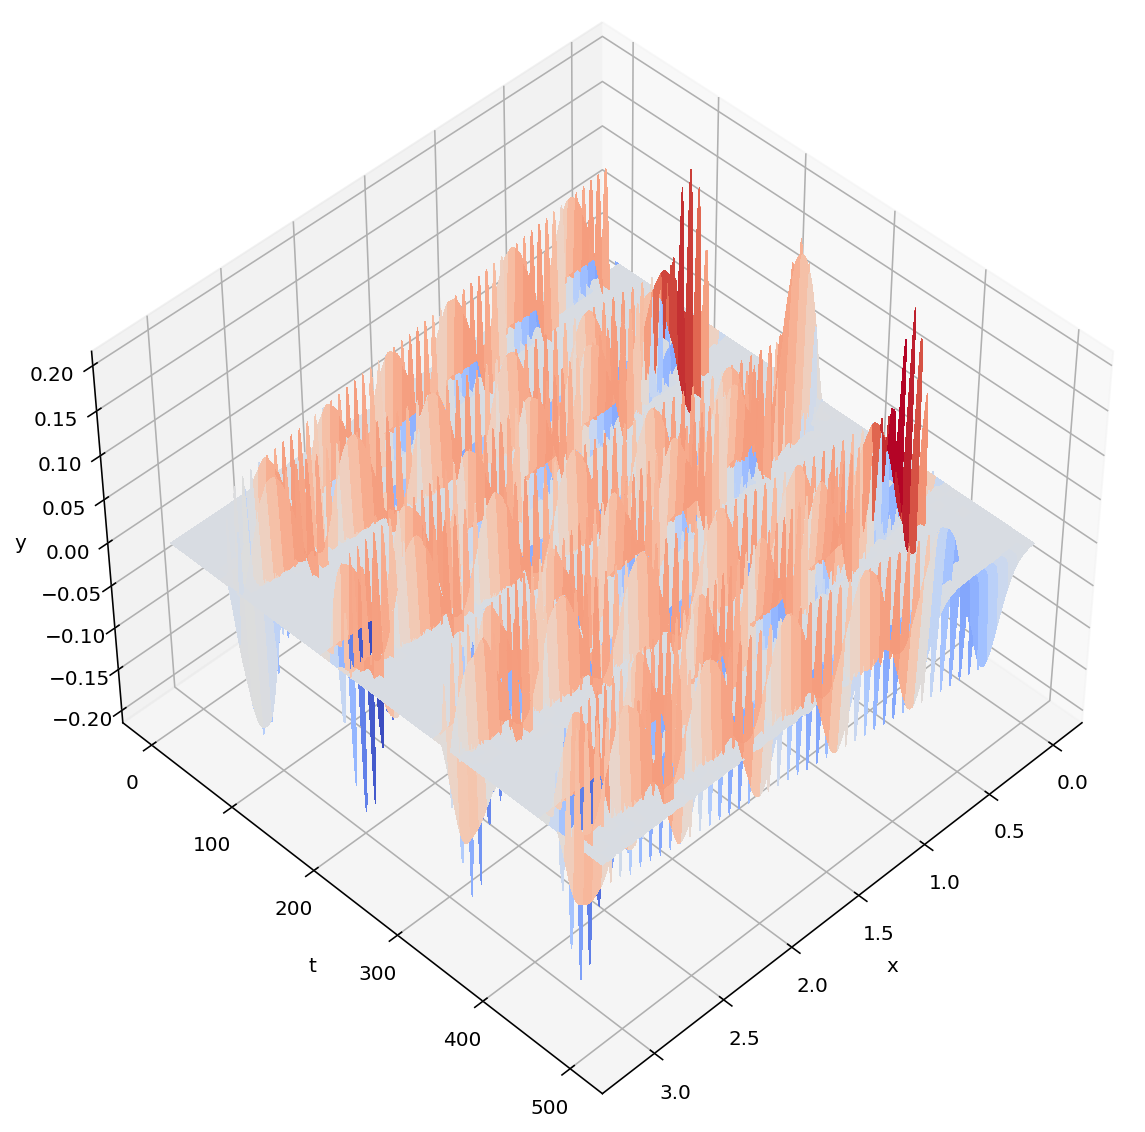

In [13]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection="3d")
x, t = np.meshgrid(x, t)
surf = ax.plot_surface(x, t, u, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('y')
ax.view_init(45, 45)
plt.show()